In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("./pics/lena_gray_256.tif")# تصویر را میخوانیم به صورت bgr


In [4]:
def quantize(image, levels): # کوانتیزه کردن یا کاهش تعداد رنگ تصویر
    # levels = number of gray levels (e.g., 2, 4, 8, 16, 32...)
    step = 256 // levels # شدت رنگ را به مقدار level تقسیم صحیح میکنیم تا فاصبله بین سطوح به دست بیاید
    return ((image // step) * step).astype(np.uint8) # حال کوانتیزه میکنیم تا به مقدار level ها سطح داشته باشیم

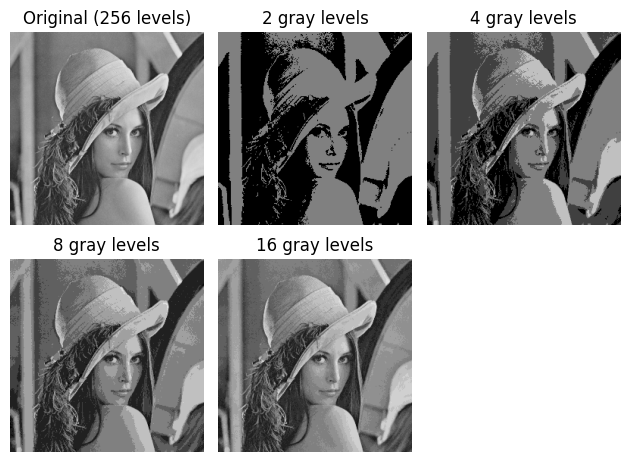

In [5]:
levels_list = [2, 4, 8, 16]   # examples of reduced quantization
plt.subplot(2, 3,1) # جدول نمایش شش تایی با ایندکس شروع 1 رسم میکنیم
plt.title("Original (256 levels)") # عنوان تصویر اول را مینوسیم 
plt.imshow(img, cmap='gray')# تصویر اصلی را به صورت خاکستری رسم میکنیم
plt.axis('off') # مخور مختصات تصویر اصلی را محو میکنیم
for i, L in enumerate(levels_list): # از لیست سطوحی که تعیین کردیم ایندکس ها را به i داده و مقادیر آن را به L میدهیم
    q = quantize(img, L) # حال در هر مرحله تصویر اصلی را به سطحی که به آن اختصاص داده ایم به تابع کوانتیزه کردن میفرستیم
    plt.subplot(2, 3, i+2)# تعیین جایگاه تصویر جدید در جدول
    plt.title(f"{L} gray levels") # نوشتن عنوان تصویر 
    plt.imshow(q, cmap='gray')# رسم تصویر جدید به صورت خاکستری
    plt.axis('off')# محو کردن محور مختصاتی تصاویر

plt.tight_layout() # باعث میشود تصاویر و عناوین در جایگاه خود بمانند و باعث بی نظمی نشود
plt.show()# نتیجه نهایی را نمایش میدهیم



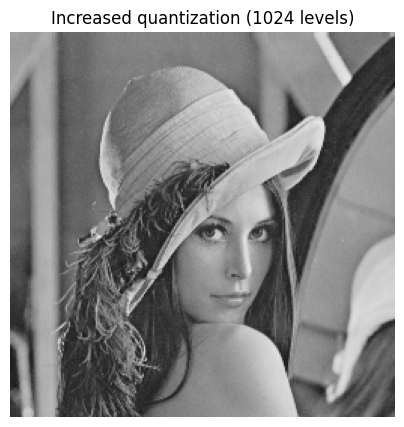

In [ ]:
levels_high = 1024  # more than original 256 → smooth 
img_float = img.astype(np.float32) / 255.0  # normalize 
img_high = np.clip((img_float * (levels_high - 1)).round() / (levels_high - 1), 0, 1) # در ابتدا مقیاس گذاری سطح انجام میگیرد به صورت گرد شده عدد صحیح و بعد مقادیر را دوباره به 0 و 1 میرساند و در انتها مقادیر را بین صفر و یک محدود میکند  

plt.figure(figsize=(5, 5)) # یک فیگر با ابعاد 5 در 5 ایجاد میکند
plt.title("Increased quantization (1024 levels)") # عنوان را نمایش میدهیم
plt.imshow(img_high, cmap='gray')# تصویر را به صورت خاکستری نمایش میدهیم
plt.axis('off') # محور های مختصاتی را محو میکنیم
plt.show()# نتیجه نهایی را نمایش میدهیم